<a href="https://colab.research.google.com/github/riyasai22/TSF-GRIP-tasks-/blob/main/gripjuly_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df=pd.read_csv('http://bit.ly/w-data')

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

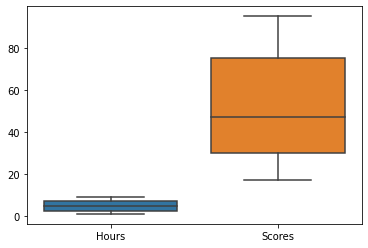

In [ ]:
#Findind the outliers
sns.boxplot(data=df)

Hence, the data doesn't contain outliers.

<function matplotlib.pyplot.show>

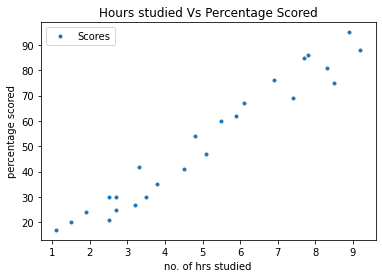

In [ ]:
#plotting the distribution of scores
df.plot(x='Hours',y='Scores',style='.')
plt.title("Hours studied Vs Percentage Scored")
plt.xlabel("no. of hrs studied")
plt.ylabel("percentage scored")
plt.show

In [ ]:
#Preparing the data
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
correlation_matrix=df.corr()
correlation_matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#Training the simple linear regression model on the training set
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Regression Line
line=regressor.coef_*x+regressor.intercept_

In [ ]:
#predicting the results
y_pred=regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
dataframe=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dataframe

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


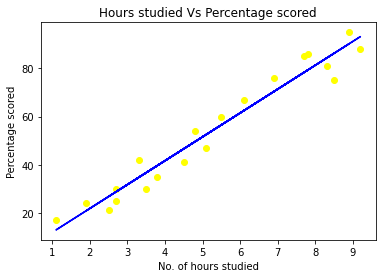

In [ ]:
#Visualizing the training set results
plt.scatter(x_train,y_train,color='yellow')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("Hours studied Vs Percentage scored")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")
plt.show()

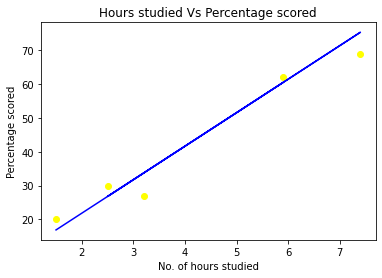

In [ ]:
#Visualizing the test set results
plt.scatter(x_test,y_test,color='yellow')
plt.plot(x_test,y_pred,color="blue")
plt.title("Hours studied Vs Percentage scored")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


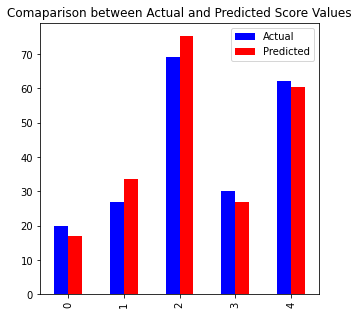

In [ ]:
dataframe.plot(kind='bar',figsize=(5,5), color=["B", "R"], title= "Comaparison between Actual and Predicted Score Values")

In [ ]:
#What will be the predicted score if a student studies for 9.25 hrs/day?
hours=[9.25]
given_pred=regressor.predict([hours])
print(given_pred[0])

93.69173248737539


In [ ]:
#Model Evaluation
mar=mean_absolute_error(y_test,y_pred)#Mean absolute error
print('Mean Absolute Error: ',mar)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))#Root mean squared error
print('Root Mean Squared Error: ',rmse)

r2=r2_score(y_test,y_pred)#Coefficient of determination
print("R-squared: ",r2)

print("Hence, we can conclude that the accuracy of the model is {}%".format(round(r2*100,2)))


Mean Absolute Error:  4.183859899002982
Root Mean Squared Error:  4.647447612100373
R-squared:  0.9454906892105354
Hence, we can conclude that the accuracy of the model is 94.55%


In [ ]:
#Getting final linear regression equation with value of the coefficient
print(regressor.coef_[0])
print(regressor.intercept_)

9.91065648064224
2.018160041434662
